In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from scipy import stats

Error.  nthreads cannot be larger than environment variable "NUMEXPR_MAX_THREADS" (64)

In [2]:
rec_state0=pd.read_csv('State0_Spmm17-20_REC-hybrid.csv')
rec_state1=pd.read_csv('State1_Spmm20_REC-hybrid.csv')
rec_state2=pd.read_csv('State2_Sp_mm20_REC-hybrid.csv')
rec_state3=pd.read_csv('State3_Spmm16_19_REC-hybrid.csv')
rec_state4=pd.read_csv('State4_Sp_native_REC-hybrid.csv')

In [4]:
ruvc_hnh_state0=pd.read_csv('State0_spmm17-20_ruvc-hnh-hybrid.csv')
ruvc_hnh_state1=pd.read_csv('State1_Spmm20_ruvc-hnh-hybrid.csv')
ruvc_hnh_state2=pd.read_csv('State2_Spmm20_ruvc-hnh-hybrid.csv')
ruvc_hnh_state3=pd.read_csv('State3_Spmm16_19_ruvc-hnh-hybrid.csv')
ruvc_hnh_state4=pd.read_csv('State4_Sp_native_Ruvc-hnh-hybrid.csv')

<AxesSubplot:ylabel='Density'>

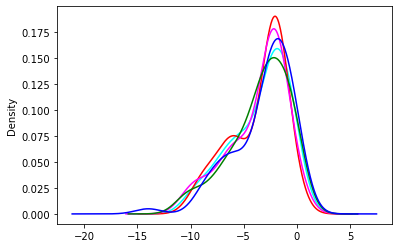

In [3]:
rec_state0.iloc[:,1:].mean()[:].plot(kind="kde", color="cyan")
rec_state1.iloc[:,1:].mean()[:].plot(kind="kde", color="red", label="rec-State-1")
rec_state2.iloc[:,1:].mean()[:].plot(kind="kde", color="magenta", label="rec-State-2")
rec_state3.iloc[:,1:].mean()[:].plot(kind="kde", color="green", label="rec-State-3")
rec_state4.iloc[:,1:].mean()[:].plot(kind="kde", color="blue", label="rec-State-4")

<AxesSubplot:ylabel='Density'>

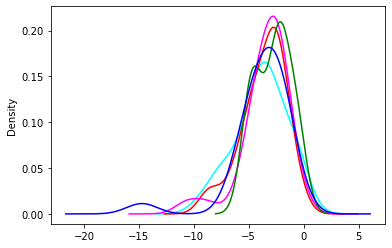

In [5]:
ruvc_hnh_state0.iloc[:,1:].mean()[:].plot(kind="kde", color="cyan")
ruvc_hnh_state1.iloc[:,1:].mean()[:].plot(kind="kde", color="red", label="ruvc_hnh-State-1")
ruvc_hnh_state2.iloc[:,1:].mean()[:].plot(kind="kde", color="magenta", label="ruvc_hnh-State-2")
ruvc_hnh_state3.iloc[:,1:].mean()[:].plot(kind="kde", color="green", label="ruvc_hnh-State-3")
ruvc_hnh_state4.iloc[:,1:].mean()[:].plot(kind="kde", color="blue", label="ruvc_hnh-State-4")

In [6]:
def prot_rec_list(dataframe):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:C:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:A:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:C:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:C:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:A:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:A:', '') for col in stddev_prot.index]
    
    return list(mean_prot.values)


def prot_ruvc_hnh_list(dataframe):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:E:', '') for col in mean_na.index]
    mean_na.index = [col.replace('L:F:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:E:', '') for col in stddev_na.index]
    stddev_na.index = [col.replace('L:F:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:B:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:B:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:C:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:C:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:D:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:D:', '') for col in stddev_prot.index]

    
    return list(mean_prot.values)

rec0=prot_rec_list(rec_state0)
rec1=prot_rec_list(rec_state1)
rec2=prot_rec_list(rec_state2)
rec3=prot_rec_list(rec_state3)
rec4=prot_rec_list(rec_state4)

ruvc0=prot_ruvc_hnh_list(ruvc_hnh_state0)
ruvc1=prot_ruvc_hnh_list(ruvc_hnh_state1)
ruvc2=prot_ruvc_hnh_list(ruvc_hnh_state2)
ruvc3=prot_ruvc_hnh_list(ruvc_hnh_state3)
ruvc4=prot_ruvc_hnh_list(ruvc_hnh_state4)

df_rec_prot=pd.DataFrame(list(zip(rec0,rec1,rec2,rec3,rec4)), columns=['Rec_State0', 'Rec_State1','Rec_State2','Rec_State3','Rec_State4'])
df_rec_prot.head()

df_ruvc_prot=pd.DataFrame(list(zip(ruvc0,ruvc1,ruvc2,ruvc3,ruvc4)), columns=['RuvC-HNH_State0', 'RuvC-HNH_State1','RuvC-HNH_State2','RuvC-HNH_State3','RuvC-HNH_State4'])
df_ruvc_prot.head()

,RuvC-HNH_State0,RuvC-HNH_State1,RuvC-HNH_State2,RuvC-HNH_State3,RuvC-HNH_State4
0,-0.54900,-2.84710,-4.53222,-2.18430,-2.32276
1,-1.04672,-5.34970,-3.00966,-2.47770,-2.58160
2,-0.39638,-2.95308,-2.45182,-1.29018,-1.33262
3,-2.93866,-3.63742,-2.24652,-2.04550,-2.36072
4,-3.46020,-1.85354,-2.20158,-0.30716,-1.63414


In [ ]:
df_rec_prot.to_csv('../fn_nodt_files/REC_protein_allstates_spcas9.csv', index=False)
df_ruvc_prot.to_csv('../fn_nodt_files/RuvC-HNH_protein_allstates_spcas9.csv', index=False)

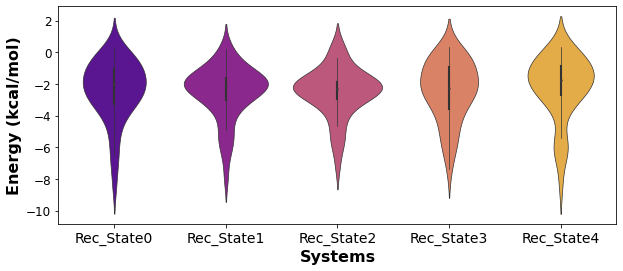

In [7]:
plt.figure(figsize=(10, 4))
sns.violinplot(df_rec_prot,palette="plasma",linewidth=0.7)
plt.ylabel('Energy (kcal/mol)', fontsize=16, fontweight='bold')
plt.xlabel('Systems', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.show()


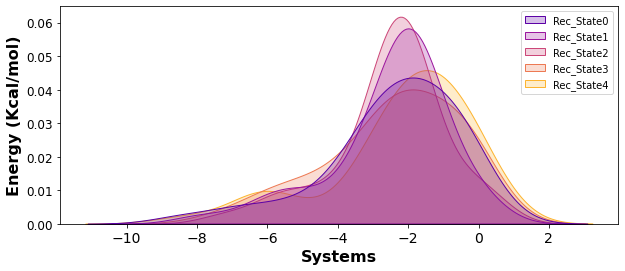

In [8]:
plt.figure(figsize=(10, 4))
sns.kdeplot(df_rec_prot,palette="plasma",fill=True)
plt.ylabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
plt.xlabel('Systems', fontsize=16, fontweight='bold')
plt.xticks(rotation=0, fontsize=14)
plt.yticks(fontsize=12)
plt.show()


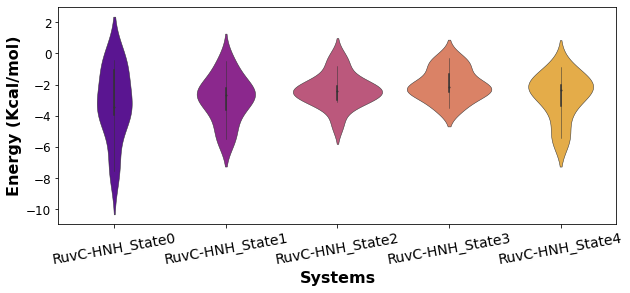

In [10]:
plt.figure(figsize=(10, 4))
sns.violinplot(df_ruvc_prot,palette="plasma",linewidth=0.5)
plt.ylabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
plt.xlabel('Systems', fontsize=16, fontweight='bold')
plt.xticks(rotation=10, fontsize=14)
plt.yticks(fontsize=12)
plt.show()


In [17]:
df_rec_prot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Rec_State0  41 non-null     float64
 1   Rec_State1  41 non-null     float64
 2   Rec_State2  41 non-null     float64
 3   Rec_State3  41 non-null     float64
 4   Rec_State4  41 non-null     float64
dtypes: float64(5)
memory usage: 1.7 KB


In [35]:
df_comb=pd.concat([df_rec_prot,df_ruvc_prot], axis=1)
df_comb.to_csv('merged.csv', index=False)                                                                                                                                                                                                                      

In [33]:
dftmp=pd.DataFrame()
dftmp=df_comb[['Rec_State0','RuvC-HNH_State0']].dropna()
dftmp

,Rec_State0,RuvC-HNH_State0
0,-2.43266,-0.54900
1,-3.37398,-1.04672
2,-1.70660,-0.39638
3,-2.61842,-2.93866
4,-2.03160,-3.46020
5,-2.38320,-3.95422
6,0.35014,-7.04022
7,-2.90824,-3.97906
8,-5.18234,-7.56410
9,-0.35152,-4.04826


Z-statistic: 0.5052572167720009
P-value: 0.6133781879770666
-6.092379
-5.409316


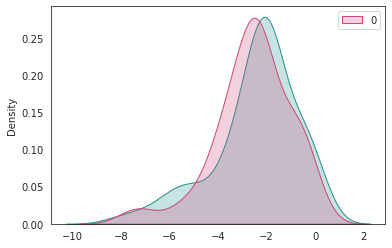

In [10]:
li1=list(df_rec_prot['Rec_State0'])
li2=list(df_rec_prot['Rec_State1'])
li3=list(df_rec_prot['Rec_State2'])
li4=list(df_rec_prot['Rec_State3'])

pi1=list(df_ruvc_prot['RuvC-HNH_State0'])
pi2=list(df_ruvc_prot['RuvC-HNH_State1'])
pi3=list(df_ruvc_prot['RuvC-HNH_State2'])
pi4=list(df_ruvc_prot['RuvC-HNH_State3'])

rec=list([li1+li2+li3+li4])
ruvc=list([pi1+pi2+pi3+pi4])

sns.kdeplot(rec, fill=True, palette='viridis')
sns.kdeplot(ruvc, fill=True, palette='plasma')



def z_test_two_distributions(sample1, sample2, alternative='two-sided'):
    """
    Perform Z-test between two distributions.

    Parameters:
        sample1 (array-like): The first sample data (1D array or list-like).
        sample2 (array-like): The second sample data (1D array or list-like).
        alternative (str, optional): The alternative hypothesis. 
                                     Options: 'two-sided', 'less', or 'greater'.
                                     Default is 'two-sided'.

    Returns:
        z_statistic (float): The Z-statistic value.
        p_value (float): The p-value of the test.
    """
    sample1 = np.array(sample1)
    sample2 = np.array(sample2)

    mean1 = np.mean(sample1)
    mean2 = np.mean(sample2)
    std1 = np.std(sample1, ddof=1)
    std2 = np.std(sample2, ddof=1)
    n1 = len(sample1)
    n2 = len(sample2)

    # Calculate the Z-score
    z = (mean1 - mean2) / np.sqrt((std1**2 / n1) + (std2**2 / n2))

    # Calculate the p-value based on the alternative hypothesis
    if alternative == 'two-sided':
        p_value = 2 * (1 - stats.norm.cdf(np.abs(z)))
    elif alternative == 'less':
        p_value = stats.norm.cdf(z)
    elif alternative == 'greater':
        p_value = 1 - stats.norm.cdf(z)
    else:
        raise ValueError("Invalid alternative hypothesis. Use 'two-sided', 'less', or 'greater'.")

    return z, p_value

z_stat, p_val = z_test_two_distributions(rec[0], ruvc[0], alternative='two-sided')
print("Z-statistic:", z_stat)
print("P-value:", p_val)

print(np.percentile(rec[0],5))
print(np.percentile(ruvc[0],5))

In [12]:
def find_imp_residues_rec(dataframe):
    df=dataframe.iloc[:,1:].median().reset_index()
    df.columns=['Residue','Energy']
    filtered_df = df[df['Energy'] < -6.09]
    values_from_B = filtered_df['Residue']
    print(values_from_B)
    
def find_imp_residues_ruvc_hnh(dataframe):
    df=dataframe.iloc[:,1:].median().reset_index()
    df.columns=['Residue','Energy']
    filtered_df = df[df['Energy'] < -5.40]
    values_from_B = filtered_df['Residue']
    print(values_from_B)

In [13]:
find_imp_residues_rec(rec_state0)
find_imp_residues_rec(rec_state1)
find_imp_residues_rec(rec_state2)
find_imp_residues_rec(rec_state3)
find_imp_residues_rec(rec_state4)

13    R:A:TYR:450
28    R:A:LYS:526
37    R:A:ARG:661
42     L:B:U:1367
43     L:B:G:1368
48     L:B:A:1378
49     L:B:G:1379
50     L:B:A:1380
51     L:B:A:1381
52     L:B:G:1382
53     L:B:A:1383
62    L:C:DA:1506
63    L:C:DC:1507
Name: Residue, dtype: object
11    R:A:PHE:405
16    R:A:TYR:450
38    R:A:ASN:588
50     L:B:A:1366
51     L:B:G:1367
52     L:B:U:1368
53     L:B:C:1369
56     L:B:A:1378
57     L:B:G:1379
58     L:B:A:1380
59     L:B:A:1381
60     L:B:G:1382
61     L:B:A:1383
66    L:C:DT:1496
67    L:C:DT:1497
68    L:C:DC:1498
69    L:C:DT:1499
72    L:C:DA:1506
Name: Residue, dtype: object
16    R:A:TYR:450
50     L:B:A:1366
51     L:B:G:1367
52     L:B:U:1368
53     L:B:C:1369
56     L:B:A:1378
57     L:B:G:1379
58     L:B:A:1380
59     L:B:A:1381
60     L:B:G:1382
61     L:B:A:1383
67    L:C:DT:1497
68    L:C:DC:1498
69    L:C:DT:1499
72    L:C:DA:1506
Name: Residue, dtype: object
3     R:A:HIE:167
8     R:A:PHE:405
13    R:A:TYR:450
43     L:B:G:1367
45     L:B:A:

In [14]:
find_imp_residues_ruvc_hnh(ruvc_hnh_state0)
find_imp_residues_ruvc_hnh(ruvc_hnh_state1)
find_imp_residues_ruvc_hnh(ruvc_hnh_state2)
find_imp_residues_ruvc_hnh(ruvc_hnh_state3)
find_imp_residues_ruvc_hnh(ruvc_hnh_state4)

6     R:D:ARG:919
8     R:D:ARG:925
14     L:E:A:1372
15     L:E:G:1373
19    L:F:DG:1500
20    L:F:DC:1501
21    L:F:DT:1502
Name: Residue, dtype: object
1      R:B:ARG:765
11    R:D:LYS:1014
18      L:E:A:1372
20      L:E:C:1374
21      L:E:A:1375
30     L:F:DT:1508
Name: Residue, dtype: object
18    L:E:A:1372
20    L:E:C:1374
21    L:E:A:1375
Name: Residue, dtype: object
24    L:F:DG:1505
Name: Residue, dtype: object
6     R:D:ARG:919
14     L:E:A:1372
16     L:E:C:1374
20    L:F:DC:1501
Name: Residue, dtype: object


In [15]:
def density_plot_prot_rec(dataframe, State, color):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:C:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:A:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:C:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:C:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:A:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:A:', '') for col in stddev_prot.index]

    plt.figure(figsize=(6, 6))
    sns.kdeplot(list(mean_prot.values), fill=True, color=color)
    plt.ylabel('Density', fontsize=16, fontweight='bold')
    plt.xlabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
    plt.title(State, fontsize=14, fontweight='bold')
    plt.xticks(rotation=0, fontsize=14)
    plt.yticks(fontsize=12)
    plt.show()

def density_plot_prot_ruvc_hnh(dataframe, State, color):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:E:', '') for col in mean_na.index]
    mean_na.index = [col.replace('L:F:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:E:', '') for col in stddev_na.index]
    stddev_na.index = [col.replace('L:F:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:B:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:B:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:C:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:C:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:D:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:D:', '') for col in stddev_prot.index]

    plt.figure(figsize=(6, 6))
    sns.kdeplot(list(mean_prot.values), fill=True, color=color)
    plt.ylabel('Density', fontsize=16, fontweight='bold')
    plt.xlabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
    plt.title(State, fontsize=14, fontweight='bold')
    plt.xticks(rotation=0, fontsize=14)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    # Make the x and y ticks point inward
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    plt.yticks(fontsize=12)
    plt.show()


def plot_mean_with_stddev(dataframe, State,save_filename=None):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:C:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:A:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:C:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:C:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:A:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:A:', '') for col in stddev_prot.index]
    
    plt.figure(figsize=(15, 6))
    # Plot the mean as a bar and the standard deviation as an error bar for 'R:A:' columns
    rec1_patch = mpatches.Patch(color='#FFDBAA', label='REC1 (94-167, 308-497)')
    rec2_patch = mpatches.Patch(color='#CECE5A', label='REC2 (168-307)')
    rec3_patch = mpatches.Patch(color='darkgreen', label='REC3 (498-713)')

    for col, mean_val, std_val in zip(mean_prot.index, mean_prot.values, stddev_prot.values):
        column_number = int(col.split(':')[1])
        color = 'darkgreen' if (498 <= column_number <= 713) else ('#CECE5A' if (168 <= column_number <= 307) else '#FFDBAA')
        plt.bar(col, mean_val, yerr=std_val, error_kw={'elinewidth': 1.0, 'capsize': 3}, color=color, edgecolor='black', linewidth=0.5)

    plt.xlabel('Residue', fontsize=16, fontweight='bold')
    plt.ylabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
    plt.title(State, fontsize=14, fontweight='bold')
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    # Make the x and y ticks point inward
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    plt.yticks(fontsize=12)

    # Add the legend
    plt.legend(handles=[rec1_patch, rec2_patch, rec3_patch], fontsize=14)
    if save_filename:  # Save the figure if filename is provided
        plt.savefig(save_filename, format='svg', bbox_inches='tight')
    else:
        plt.show()



def plot_mean_with_stddev_ruvc(dataframe, State,save_filename=None):
    columns_lc = [col for col in dataframe.columns if col.startswith('L:')]
    columns_ra = [col for col in dataframe.columns if col.startswith('R:')]

    mean_na = dataframe[columns_lc].mean()
    mean_prot = dataframe[columns_ra].mean()
    stddev_na = dataframe[columns_lc].std()
    stddev_prot = dataframe[columns_ra].std()

    mean_na.index = [col.replace('L:E:', '') for col in mean_na.index]
    mean_na.index = [col.replace('L:F:', '') for col in mean_na.index]
    stddev_na.index = [col.replace('L:E:', '') for col in stddev_na.index]
    stddev_na.index = [col.replace('L:F:', '') for col in stddev_na.index]

    mean_prot.index = [col.replace('R:B:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:B:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:C:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:C:', '') for col in stddev_prot.index]
    mean_prot.index = [col.replace('R:D:', '') for col in mean_prot.index]
    stddev_prot.index = [col.replace('R:D:', '') for col in stddev_prot.index]

    plt.figure(figsize=(8, 6))
    # Plot the mean as a bar and the standard deviation as an error bar for 'R:A:' columns
    ruvc_patch = mpatches.Patch(color='#FBA1B7', label='RuvC (1-56,718-765,918-1099)')
    hnh_patch = mpatches.Patch(color='#F4D160', label='HNH (780-906)')
    
    for col, mean_val, std_val in zip(mean_prot.index, mean_prot.values, stddev_prot.values):
        column_number = int(col.split(':')[1])
        color = '#F4D160' if (780 <= column_number <= 906) else '#FBA1B7'
        plt.bar(col, mean_val, yerr=std_val, error_kw={'elinewidth': 1.0, 'capsize': 3}, color=color, edgecolor='black',linewidth=0.5)
    plt.xlabel('Residue', fontsize=16, fontweight='bold')
    plt.ylabel('Energy (Kcal/mol)', fontsize=16, fontweight='bold')
    plt.title(State, fontsize=14, fontweight='bold')
    plt.xticks(rotation=90, fontsize=14)
    plt.yticks(fontsize=12)
    ax = plt.gca()
    ax.spines['left'].set_linewidth(1)
    ax.spines['bottom'].set_linewidth(1)
    ax.spines['top'].set_linewidth(1)
    ax.spines['right'].set_linewidth(1)
    # Make the x and y ticks point inward
    plt.tick_params(axis='x', direction='in')
    plt.tick_params(axis='y', direction='in')
    plt.yticks(fontsize=12)
    # Add the legend
    plt.legend(handles=[ruvc_patch, hnh_patch], fontsize=12)
    if save_filename:  # Save the figure if filename is provided
        plt.savefig(save_filename, format='svg', bbox_inches='tight')
    else:
        plt.show()


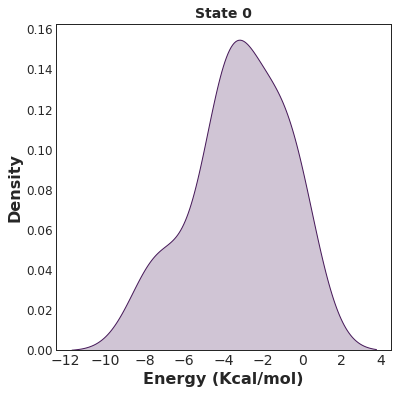

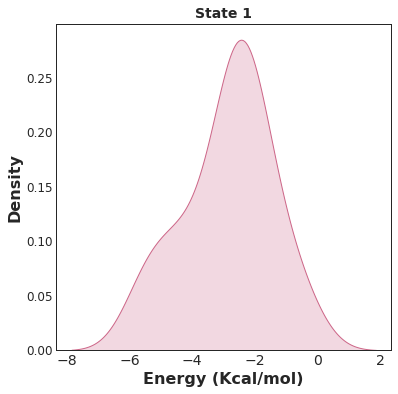

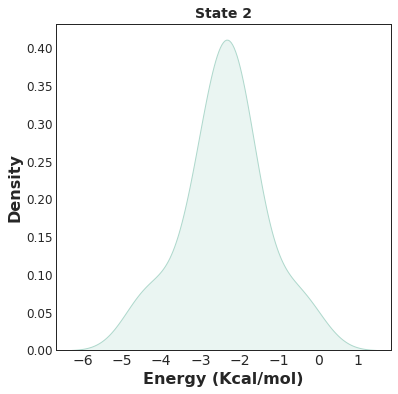

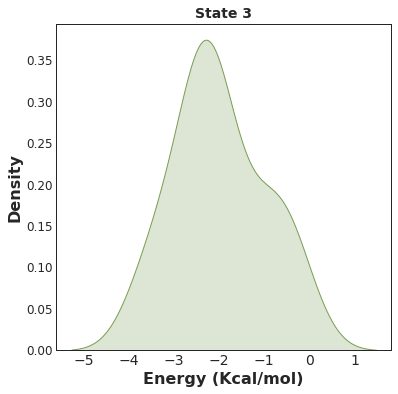

In [16]:
density_plot_prot_ruvc_hnh(ruvc_hnh_state0, "State 0", '#461959')
density_plot_prot_ruvc_hnh(ruvc_hnh_state1, "State 1", '#CD6688')
density_plot_prot_ruvc_hnh(ruvc_hnh_state2, "State 2",'#AED8CC')
density_plot_prot_ruvc_hnh(ruvc_hnh_state3, "State 3",'#7A9D54')

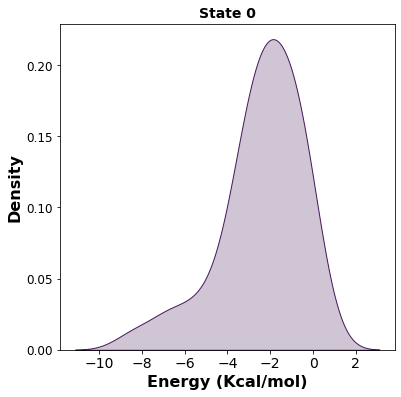

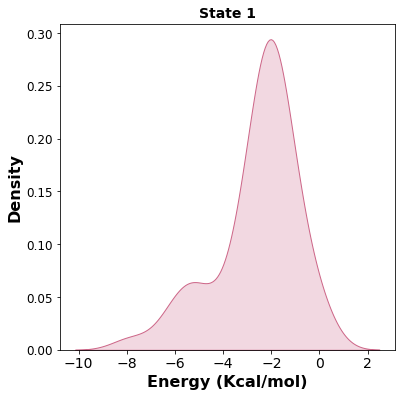

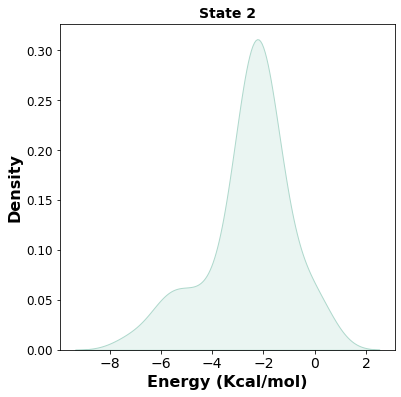

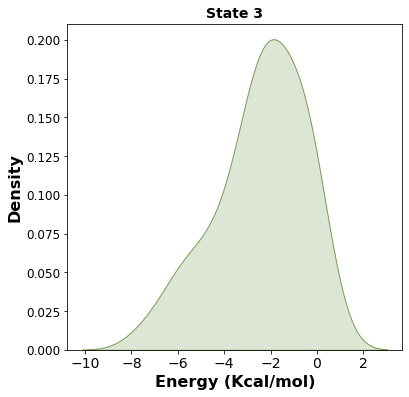

In [39]:
density_plot_prot_rec(rec_state0, "State 0", '#461959')
density_plot_prot_rec(rec_state1, "State 1", '#CD6688')
density_plot_prot_rec(rec_state2, "State 2",'#AED8CC')
density_plot_prot_rec(rec_state3, "State 3",'#7A9D54')

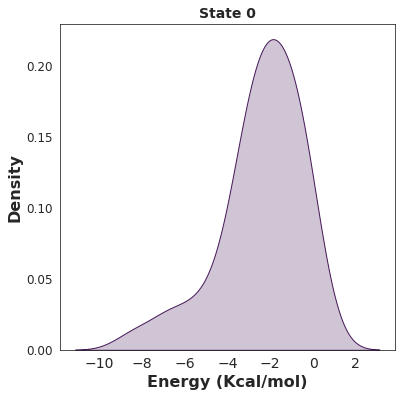

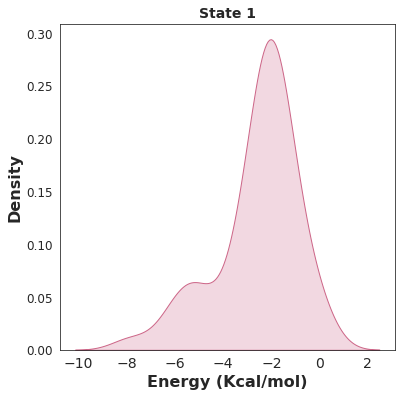

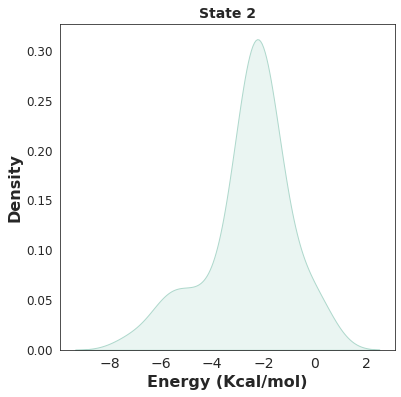

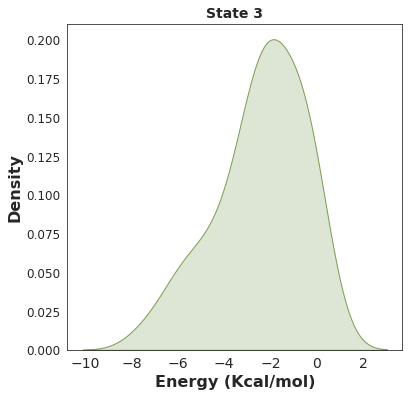

In [17]:
density_plot_prot_rec(rec_state0, "State 0", '#461959')
density_plot_prot_rec(rec_state1, "State 1", '#CD6688')
density_plot_prot_rec(rec_state2, "State 2",'#AED8CC')
density_plot_prot_rec(rec_state3, "State 3",'#7A9D54')

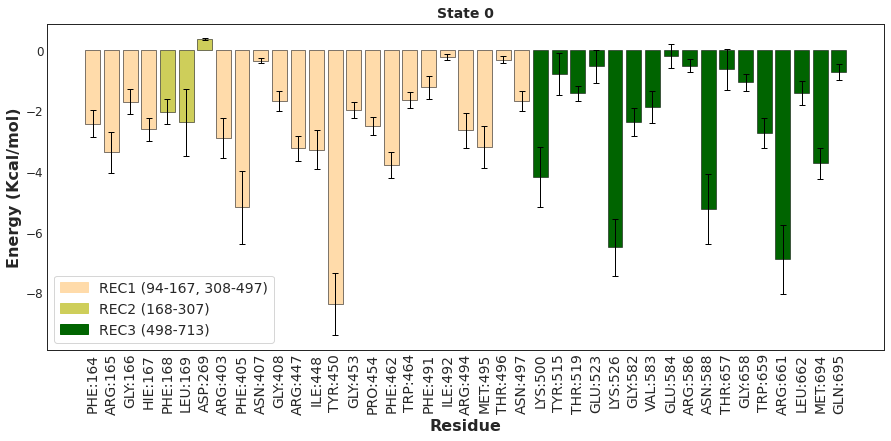

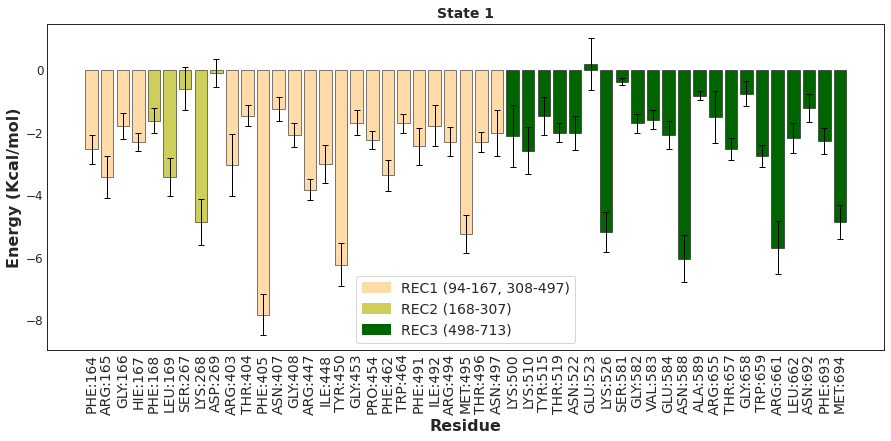

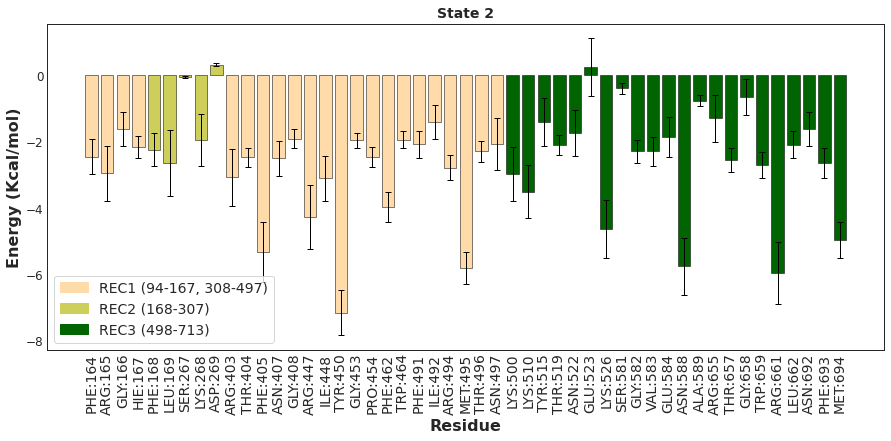

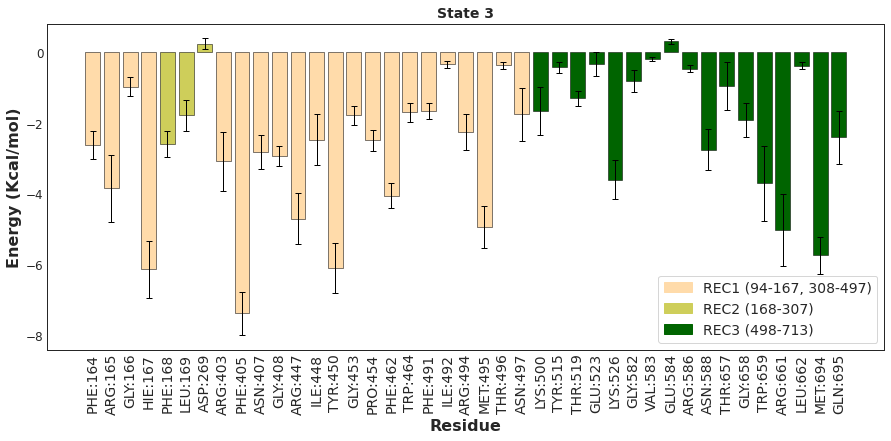

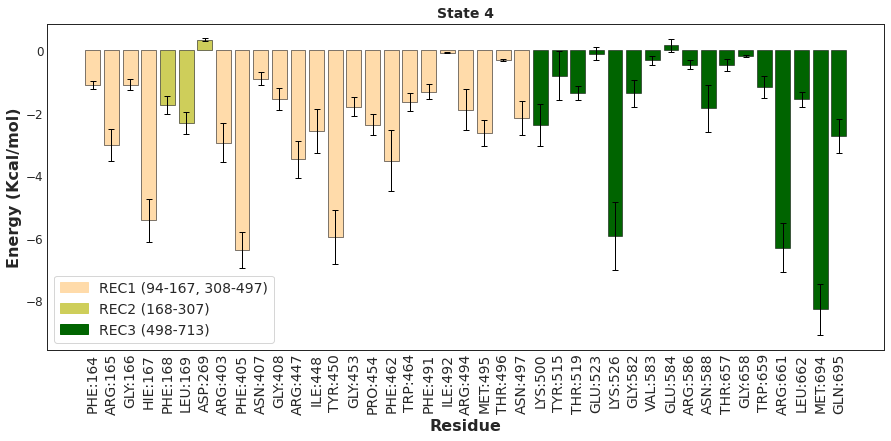

In [18]:
# plot_mean_with_stddev(rec_state0,"State 0")
# plot_mean_with_stddev(rec_state1,"State 1")
# plot_mean_with_stddev(rec_state2,"State 2")
# plot_mean_with_stddev(rec_state3, "State 3")
# plot_mean_with_stddev(rec_state4, "State 4")


plot_mean_with_stddev(rec_state0,"State 0",save_filename='sp_rec_state0.svg')
plot_mean_with_stddev(rec_state1,"State 1",save_filename='sp_rec_state1.svg')
plot_mean_with_stddev(rec_state2,"State 2",save_filename='sp_rec_state2.svg')
plot_mean_with_stddev(rec_state3, "State 3",save_filename='sp_rec_state3.svg')
plot_mean_with_stddev(rec_state4, "State 4",save_filename='sp_rec_state4.svg')

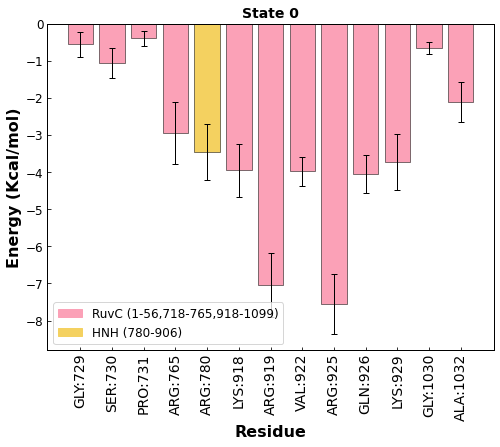

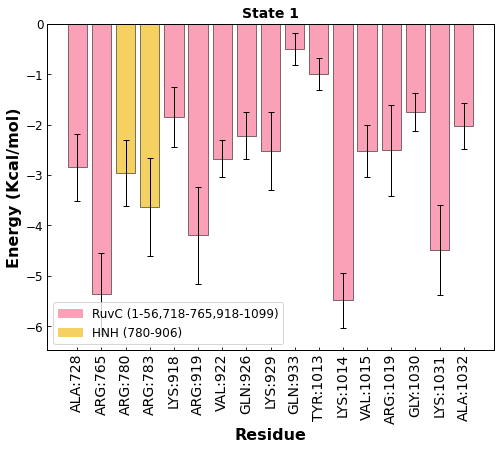

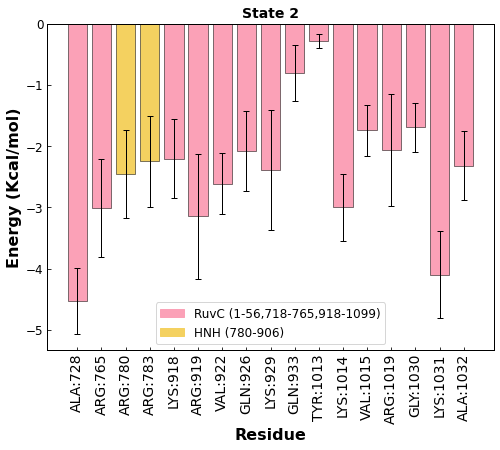

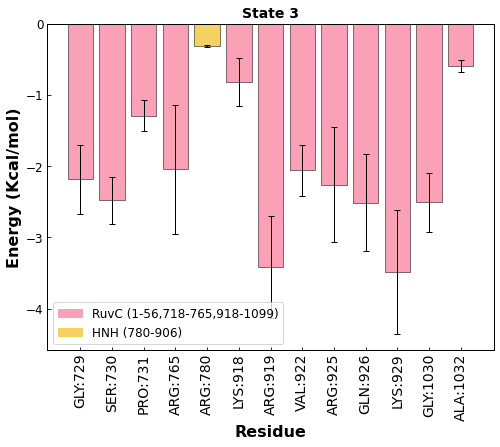

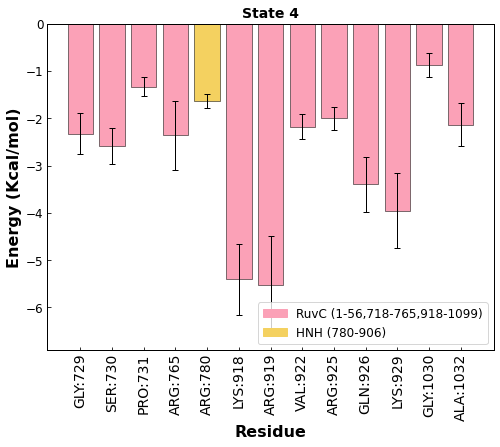

In [23]:
# Call the function with 'rec_state1' DataFrame as input

plot_mean_with_stddev_ruvc(ruvc_hnh_state0, "State 0",save_filename='sp_ruvc_hnh_state0.svg') #save_filename='figure.svg'
plot_mean_with_stddev_ruvc(ruvc_hnh_state1,"State 1",save_filename='sp_ruvc_hnh_state1.svg')
plot_mean_with_stddev_ruvc(ruvc_hnh_state2,"State 2",save_filename='sp_ruvc_hnh_state2.svg')
plot_mean_with_stddev_ruvc(ruvc_hnh_state3,"State 3",save_filename='sp_ruvc_hnh_state3.svg')
plot_mean_with_stddev_ruvc(ruvc_hnh_state4,"State 4",save_filename='sp_ruvc_hnh_state4.svg')